In [1]:
import requests
import pandas as pd
import json
import re

from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as soup
from tqdm import tqdm_notebook as tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir("/content/drive/My Drive/CA683 Assignment2")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#Test code to get data from koln

df = pd.DataFrame({
      'player_id': [],#complete
      'player_name': [],#complete
      'team_id': [],#complete
      'nationality': [],#complete
      'season': [],#complete
      'date_stamp': [],#complete
      'team_host_name': [],#complete
      'team_visit_name': [],#complete
      'mark1': [], #complete
      'mark2': [], #complete
      'ranking': [],#complete
      'player_height': [],#complete
      'player_weight': [],#complete
      'player_age': [],#complete
      'player_role_G': [],#complete
      'player_role_D': [],#complete
      'player_role_DM': [],#complete
      'player_role_M': [],#complete
      'player_role_AM': [],#complete
      'player_role_F': [],#complete

    })


team_href_list = ['https://www.footballcritic.com/manchester-city-fc/squad/464'\
          ,'https://www.footballcritic.com/liverpool-fc/squad/462'\
          ,'https://www.footballcritic.com/chelsea-fc/squad/471'\
          ,'https://www.footballcritic.com/manchester-united-fc/squad/475'\
          ,'https://www.footballcritic.com/west-ham-united-fc/squad/496'\
          ,'https://www.footballcritic.com/arsenal-fc/squad/467'\
          ,'https://www.footballcritic.com/tottenham-hotspur-fc/squad/472'\
          ,'https://www.footballcritic.com/wolverhampton-wanderers-fc/squad/459'\
          ,'https://www.footballcritic.com/brighton-hove-albion-fc/squad/510'\
          ,'https://www.footballcritic.com/southampton-fc/squad/506'\
          ,'https://www.footballcritic.com/leicester-city-fc/squad/489'\
          ,'https://www.footballcritic.com/aston-villa-fc/squad/461'\
          ,'https://www.footballcritic.com/crystal-palace-fc/squad/508'\
          ,'https://www.footballcritic.com/brentford-fc/squad/500'\
          ,'https://www.footballcritic.com/leeds-united-fc/squad/497'\
          ,'https://www.footballcritic.com/everton-fc/squad/473'\
          ,'https://www.footballcritic.com/newcastle-united-fc/squad/466'\
          ,'https://www.footballcritic.com/watford-fc/squad/511'\
          ,'https://www.footballcritic.com/burnley-fc/squad/492'\
          ,'https://www.footballcritic.com/norwich-city-fc/squad/477'
          ]
season = ['2014/2015','2015/2016','2016/2017','2017/2018','2018/2019','2019/2020','2020/2021','2021/2022']
for team_href in tqdm(team_href_list):
  HEADERS = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko)'}
  req = Request(team_href, headers=HEADERS)
  webpage = urlopen(req).read()
  page_soup = soup(webpage, "html.parser")

  team_json = json.loads(page_soup.find('script',{'type':'application/ld+json'}).get_text())
  team_name = team_json['name']
  print('Now is working on Team: ' + team_name + "\t\t\tHref : " + team_href)
  for player_json in team_json['member']:

    if 'member' not in player_json:
      continue

    #player basic info
    player_age = "None"
    player_height = "None"
    player_weight = "None"
    player_name = "None"
    player_role_D = "None"
    player_role_DM = "None"
    player_role_M = "None"
    player_role_AM = "None"
    player_role_F = "None"
    if 'name' in player_json['member']:
      player_name = player_json['member']['name']
    if 'birthDate' in player_json['member']:
      player_birthDate = player_json['member']['birthDate']
      player_age = 2021 - int(player_birthDate.split("-")[0])
    if 'height' in player_json['member']:
      player_height = player_json['member']['height'][0:-2]
    if 'weight' in player_json['member']:
      player_weight = player_json['member']['weight'][0:-2]
    if 'roleName' in player_json:
      player_role_G = "False"
      player_role_D = "False"
      player_role_DM = "False"
      player_role_M = "False"
      player_role_AM = "False"
      player_role_F = "False"
      
      player_role = player_json['roleName']
      #print(player_role)
      player_role_re = re.sub(' ', '', player_role)
      player_role_re = re.sub('\(.*?\)', '', player_role_re)
      player_role_list = player_role_re.split(',')
      for player_role_name in player_role_list:
        ##print(player_role_name)
        if player_role_name == 'Goalkeeper':
          player_role_G = "True"
        if player_role_name == 'Defender':
          player_role_D = "True"
        if player_role_name == 'DefensiveMidfielder':
          player_role_DM = "True"
        if player_role_name == 'Midfielder':
          player_role_M = "True"
        if player_role_name == 'AttackingMidfielder':
          player_role_AM = "True"
        if player_role_name == 'Forward':
          player_role_F = "True"
        if player_role_name == 'Striker':
          player_role_F = "True"





    player_href = player_json['member']['mainEntityOfPage']['@id']
    templist = player_href.split("/")
    player_name_format = templist[3]
    player_id = templist[5]



    new_player_href = "https://www.footballcritic.com/" + player_name_format + "/player-matches/" + player_id +"/season-2021-2022/50885"
    print('\tNow is working on Player: ' + player_name + "\t\t\tHref : " + new_player_href)
    print("\t\tPlayer Postion:" + player_role)
    
    req0 = Request(new_player_href, headers=HEADERS)
    webpage0 = urlopen(req0).read()
    page_soup0 = soup(webpage0, "html.parser")

    for season_str in season:
      player_season_href = ''
      if len(page_soup0(text = season_str))>0:
        option_value = page_soup0(text = season_str)[0].parent.get('value')
        player_season_href = "https://www.footballcritic.com/" + player_name_format + "/player-matches/" + player_id +"/season-" + season_str.replace("/","-") + "/"+ option_value
        print('\t\tworking in season:' + season_str)
      else:
        print('\t\tcant find data in season:' + season_str)
        continue
      
      req1 = Request(player_season_href, headers=HEADERS)
      webpage1 = urlopen(req1).read()
      page_soup1 = soup(webpage1, "html.parser")
      #nationality
      nationality = "None"
      if len(page_soup1(text = "Nationality:"))>0:
        nationality_result = page_soup1(text = "Nationality:")[0].parent.parent.find_all("span")
        if len(nationality_result)>1:
          nationality = nationality_result[1].string

      #print("\t\tNationality:" + nationality)
      rate_list = []
      host_team_list = []
      visit_team_list = []
      mark1_list = []
      mark2_list = []
      date_stamp_list = []
      #ratings
      rate_resultlist = page_soup1.find_all("td", attrs={"class" :"ratings"})
      #print(rate_resultlist)
      print("\t\t\tNum of Records:" + str(len(rate_resultlist)))
      for rate_result in rate_resultlist:
        if rate_result.find("div") is None:
          rate_list.append("None")
        else:
          rate_list.append(rate_result.find("div").string)
      #print(rate_list)

      
      #team names(both side)
      b_resultlist = page_soup1.find_all("span", attrs={"class" :"team-name"}) 
      count = 0
      for b_result in b_resultlist:
        count = count + 1
        temp_team_name = ""
        if len(b_result.find_all("b")):
          temp_team_name = b_result.find("b").string.strip()
        else:
          temp_team_name = b_result.find("a").string.strip()

        if count%2 == 1:
          host_team_list.append(temp_team_name)
        else:
          visit_team_list.append(temp_team_name)
      #print(host_team_list)
      #print(visit_team_list)

      #marks(both side)
      mark_resultlist = page_soup1.find_all("div", attrs={"class" :"btn-info blue"})
      count = 0
      for mark_result in mark_resultlist:
        count = count + 1
        if count%2 == 1:
          markline_str = mark_result.string
          markline_list = markline_str.split(" - ")
          mark1_list.append(markline_list[0])
          mark2_list.append(markline_list[1])
      #print(mark1_list)
      #print(mark2_list)

      #date stamp
      date_resulitlist = page_soup1.find_all("td", attrs={"class" :"timezone"})
      for date_result in date_resulitlist:
        date_stamp_str = date_result.get("data-timestamp")
        date_stamp_list.append(date_stamp_str)
      #print(date_stamp_list)


      #check length
      if((len(rate_list) == len(host_team_list))&\
        (len(rate_list) == len(visit_team_list))&\
        (len(rate_list) == len(mark1_list))&\
        (len(rate_list) == len(mark2_list))&\
        (len(rate_list) == len(date_stamp_list))):
        print("\t\t\tAll lengths Correct")
      else:
        print("\t\t\tSome lengths are Incorrect!!!!!!!!!!!")
        continue

      #print("\t\tAppending records to DataFrame")
      for index in range(0,len(rate_list)):
        df = df.append({'player_id':player_id,\
              'player_name':player_name,\
              'team_id':team_name,\
              'season':season_str,\
              'nationality':nationality,\
              'player_role_G':player_role_G,\
              'player_role_D':player_role_D,\
              'player_role_DM':player_role_DM,\
              'player_role_M':player_role_M,\
              'player_role_AM':player_role_AM,\
              'player_role_F':player_role_F,\
              'player_age':player_age,\
              'player_height':player_height,\
              'player_weight':player_weight,\
              'date_stamp':date_stamp_list[index],\
              'team_host_name':host_team_list[index],\
              'team_visit_name':visit_team_list[index],\
              'mark1':mark1_list[index],\
              'mark2':mark2_list[index],\
              'ranking':rate_list[index]},ignore_index='true')
      
      print("\t\t\tLength of DataFrame:" + str(len(df)))

print(df)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/20 [00:00<?, ?it/s]

流式输出内容被截断，只能显示最后 5000 行内容。
		working in season:2015/2016
			Num of Records:41
			All lengths Correct
			Length of DataFrame:72560
		working in season:2016/2017
			Num of Records:18
			All lengths Correct
			Length of DataFrame:72578
		working in season:2017/2018
			Num of Records:32
			All lengths Correct
			Length of DataFrame:72610
		working in season:2018/2019
			Num of Records:39
			All lengths Correct
			Length of DataFrame:72649
		working in season:2019/2020
			Num of Records:40
			All lengths Correct
			Length of DataFrame:72689
		working in season:2020/2021
			Num of Records:32
			All lengths Correct
			Length of DataFrame:72721
		working in season:2021/2022
			Num of Records:22
			All lengths Correct
			Length of DataFrame:72743
	Now is working on Player: Charlie Cresswell			Href : https://www.footballcritic.com/charlie-cresswell/player-matches/416463/season-2021-2022/50885
		Player Postion:Defender (Centre)
		cant find data in season:2014/2015
		cant find data in season:2015/

In [4]:
df


,player_id,player_name,team_id,nationality,season,date_stamp,team_host_name,team_visit_name,mark1,mark2,ranking,player_height,player_weight,player_age,player_role_G,player_role_D,player_role_DM,player_role_M,player_role_AM,player_role_F
0,673,Scott Carson,Man City,England,2014/2015,1407592800,Wigan Athletic,Reading,2,2,None,183,85,36.0,True,False,False,False,False,False
1,673,Scott Carson,Man City,England,2014/2015,1408197600,Charlton,Wigan Athletic,2,1,None,183,85,36.0,True,False,False,False,False,False
2,673,Scott Carson,Man City,England,2014/2015,1408473900,Cardiff,Wigan Athletic,1,0,None,183,85,36.0,True,False,False,False,False,False
3,673,Scott Carson,Man City,England,2014/2015,1408802400,Wigan Athletic,Blackpool,1,0,None,183,85,36.0,True,False,False,False,False,False
4,673,Scott Carson,Man City,England,2014/2015,1409407200,Wigan Athletic,Birmingham,4,0,None,183,85,36.0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102362,15666,Teemu Pukki,Norwich,Finland,2021/2022,1642795200,Watford,Norwich,0,3,None,180,78,31.0,False,False,False,False,False,True
102363,15666,Teemu Pukki,Norwich,Finland,2021/2022,1644073200,Wolves,Norwich,0,1,None,180,78,31.0,False,False,False,False,False,True
102364,15666,Teemu Pukki,Norwich,Finland,2021/2022,1644435900,Norwich,Crystal Palace,1,1,None,180,78,31.0,False,False,False,False,False,True
102365,15666,Teemu Pukki,Norwich,Finland,2021/2022,1644687000,Norwich,Man City,0,4,None,180,78,31.0,False,False,False,False,False,True


In [11]:
df_new=df[df['ranking']!='None']
print(len(df_new))

63111


In [92]:
df_hk = df_new[(df_new['player_name']=='Harry Kane')&(df_new['season']=='2020/2021')]

In [93]:
import datetime
hk_rankinglist = list(df_hk['ranking'].astype(float))
hk_timelist = list(df_hk['date_stamp'].astype(float))
hk_timelist = [datetime.datetime.fromtimestamp(x) for x in hk_timelist ]

for x in 

SyntaxError: ignored

In [89]:
label_time = datetime.datetime(2021, 5, 30, 15, 0)
label_time1 = datetime.datetime(2021, 4, 15, 15, 0)

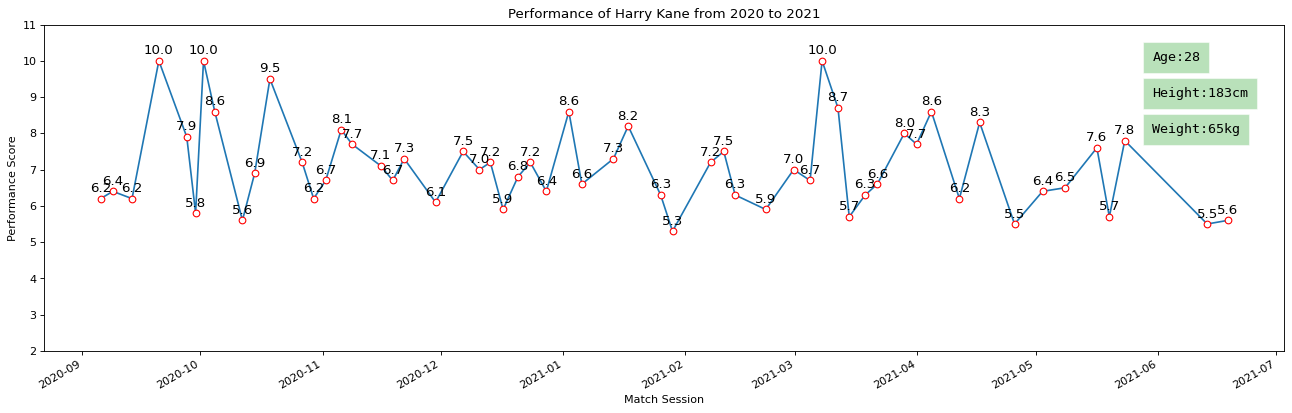

In [91]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,6),dpi=80)

plt.subplot(1, 1, 1)

plt.plot(hk_timelist,hk_rankinglist, marker='o', mec='r', mfc='w')

for time,score in zip(hk_timelist,hk_rankinglist):
  plt.text(time,score+0.1,score,ha='center',va='bottom',fontsize=12)

text1 = plt.text(x=label_time,#文本x轴坐标 
         y=10.0, #文本y轴坐标
         s='Age:28', #文本内容
         fontdict=dict(fontsize=12, color='r',family='monospace',),#字体属性字典
         #添加文字背景色
         bbox={'facecolor': '#74C476', #填充色
              'edgecolor':'white',#外框色
               'alpha': 0.5, #框透明度
               'pad': 8,#本文与框周围距离
               }
        )
text1.set_color('black')
text2 = plt.text(x=label_time,#文本x轴坐标 
         y=9.0, #文本y轴坐标
         s='Height:183cm', #文本内容
         fontdict=dict(fontsize=12, color='r',family='monospace',),#字体属性字典
         #添加文字背景色
         bbox={'facecolor': '#74C476', #填充色
              'edgecolor':'white',#外框色
               'alpha': 0.5, #框透明度
               'pad': 8,#本文与框周围距离
               }
        )
text2.set_color('black')
text3 = plt.text(x=label_time,#文本x轴坐标 
         y=8.0, #文本y轴坐标
         s='Weight:65kg', #文本内容
         fontdict=dict(fontsize=12, color='r',family='monospace',),#字体属性字典
         #添加文字背景色
         bbox={'facecolor': '#74C476', #填充色
              'edgecolor':'white',#外框色
               'alpha': 0.5, #框透明度
               'pad': 8,#本文与框周围距离
               }
        )
text3.set_color('black')


plt.ylabel('Performance Score')
plt.xlabel('Match Session')
plt.title('Performance of Harry Kane from 2020 to 2021')
plt.gcf().autofmt_xdate()
plt.yticks(np.arange(2.0, 12.0, 1.0))
plt.show()

In [5]:
#save data
df.to_csv('Premier League_2014_2022.csv',index=False)

In [6]:
pd.set_option("display.max_rows", 1000)#可显示1000行
pd.set_option("display.max_columns", 1000)#可显示1000列
df[df["player_id"]=="12303"]

,player_id,player_name,team_id,nationality,season,date_stamp,team_host_name,team_visit_name,mark1,mark2,ranking,player_height,player_weight,player_age,player_role_G,player_role_D,player_role_DM,player_role_M,player_role_AM,player_role_F


In [7]:
type(player_json['member'])

dict

In [8]:
player_role_name_re = re.sub(' ', '', 'Defender (Centre, Left)')
player_role_name_re = re.sub('\(.*?\)', '', player_role_name_re)
player_role_name_re

'Defender'

In [49]:
from urllib import parse
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as soup




team_href = 'https://www.footballcritic.com/brondby-if/team-matches/18487/season-2020-2021/40744'
season = "2019/2020"


df_team = pd.DataFrame({
      'date_stamp': [],#complete
      'team_host_name': [],#complete
      'team_visit_name': [],#complete
      'mark1': [], #complete
      'mark2': [], #complete
      'ranking': [],#complete
    })

HEADERS = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko)'}
req1 = Request(team_href, headers=HEADERS)
webpage1 = urlopen(req1).read()
page_soup1 = soup(webpage1, "html.parser")
rate_resultlist = page_soup1.find_all("td", attrs={"class" :"ratings"})
#print(rate_resultlist)


rate_list = []
host_team_list = []
visit_team_list = []
mark1_list = []
mark2_list = []
date_stamp_list = []

print("\t\tNum of Records:" + str(len(rate_resultlist)))
for rate_result in rate_resultlist:
  if rate_result.find("div") is None:
    rate_list.append("None")
  else:
    rate_list.append(rate_result.find("div").string)


#team names(both side)
b_resultlist = page_soup1.find_all("span", attrs={"class" :"team-name"}) 
count = 0
for b_result in b_resultlist:
  count = count + 1
  temp_team_name = ""
  if len(b_result.find_all("b")):
    temp_team_name = b_result.find("b").string.strip()
  else:
    temp_team_name = b_result.find("a").string.strip()

  if count%2 == 1:
    host_team_list.append(temp_team_name)
  else:
    visit_team_list.append(temp_team_name)
#print(host_team_list)
#print(visit_team_list)
#marks(both side)
mark_resultlist = page_soup1.find_all("div", attrs={"class" :"btn-info blue"})
for mark_result in mark_resultlist:
    markline_str = mark_result.span.string
    markline_list = markline_str.split(" - ")
    mark1_list.append(markline_list[0])
    mark2_list.append(markline_list[1])
#print(mark1_list)
#print(mark2_list)

#date stamp
date_resulitlist = page_soup1.find_all("td", attrs={"class" :"date"})
for date_result in date_resulitlist:
  date_stamp_str = date_result.string.strip("\n")
  date_stamp_list.append(date_stamp_str)
#print(date_stamp_list)
if((len(rate_list) == len(host_team_list))&\
  (len(rate_list) == len(visit_team_list))&\
  (len(rate_list) == len(mark1_list))&\
  (len(rate_list) == len(mark2_list))&\
  (len(rate_list) == len(date_stamp_list))):
  print("\t\tAll lengths Correct")
else:
  print("\t\t Some lengths are Incorrect!!!!!!!!!!!")
  print("\t\t rate_list"+str(len(rate_list)))
  print("\t\t host_team_list"+str(len(host_team_list)))
  print("\t\t visit_team_list"+str(len(visit_team_list)))
  print("\t\t mark1_list"+str(len(mark1_list)))
  print("\t\t mark2_list"+str(len(mark2_list)))
  print("\t\t date_stamp_list"+str(len(date_stamp_list)))


for index in range(0,len(rate_list)):
  df_team = df_team.append({'date_stamp':date_stamp_list[index],\
        'team_host_name':host_team_list[index],\
        'team_visit_name':visit_team_list[index],\
        'mark1':mark1_list[index],\
        'mark2':mark2_list[index],\
        'ranking':rate_list[index]},ignore_index='true')
print("\t\tLength of DataFrame:" + str(len(df_team)))

		Num of Records:34
		All lengths Correct
		Length of DataFrame:34


In [51]:
type(df_team['date_stamp'][0])

str

In [53]:
date_stamp_str

'May 24, 2021 '